# 本节课内容包括两大部分
# 1. 数学工具
## （1）逼近法
## （2）凸优化
## （3）积分
# 2. 时间序列
## （1）时间序列基础
## （2）重采样和频度转换
## （3）日期范围，频度，和位移
## （4）AR, MA, ARIMA, ARCH, GARCH

# Mathematical Tools

## Approximation
## 包括回归和插值。通过回归和插值求该函数的近似值

In [3]:
import numpy as np
from pylab import plt, mpl

In [4]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [5]:
def f(x):
    return np.sin(x) + 0.5 * x

In [27]:
def create_plot(x, y,axlabels):
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], label='f(x)')
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

In [73]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)  

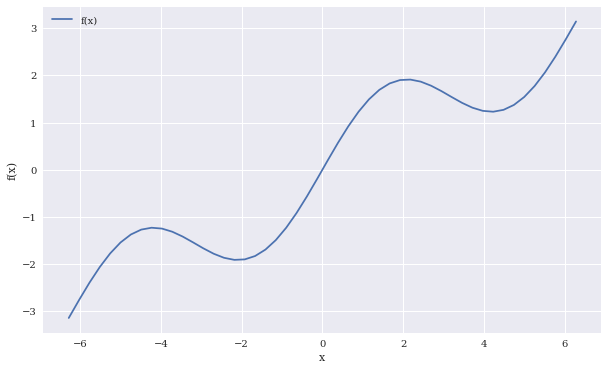

In [74]:
create_plot([x], [f(x)], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_01.png');

### Regression

In [249]:
reg = np.polyfit(x, f(x) , deg=1)
ry = np.polyval(reg, x)

Text(0, 0.5, 'f(x)')

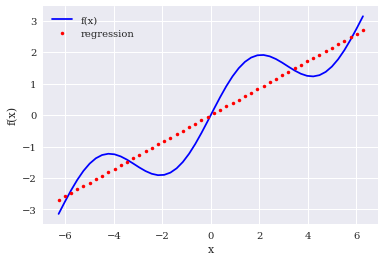

In [76]:
plt.plot(x, f(x) , 'b' , label='f(x)') 
plt.plot(x, ry, 'r.', label='regression') 
plt.legend(loc=0)
plt.grid(True)
plt. xlabel( 'x') 
plt.ylabel('f(x)')

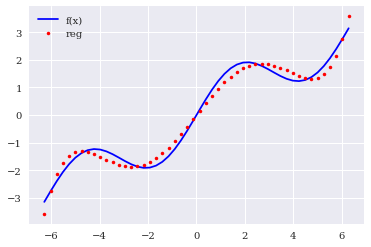

In [80]:
reg=np.polyfit(x,f(x),deg=5)
ry=np.polyval(reg,x)
plt.plot(x,f(x),'b',label='f(x)')
plt.grid(True)
plt.plot(x,ry,'r.',label='reg')
plt.legend(loc=0)

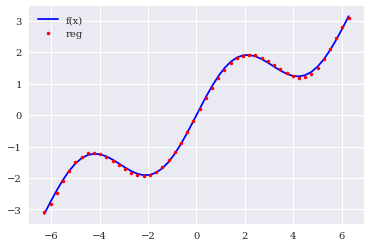

In [81]:
reg=np.polyfit(x,f(x),deg=7)
ry=np.polyval(reg,x)
plt.plot(x,f(x),'b',label='f(x)')
plt.grid(True)
plt.plot(x,ry,'r.',label='reg')
plt.legend(loc=0)

In [82]:
np.allclose(f(x), ry)  

False

In [83]:
np.mean((f(x) - ry) ** 2)  

0.0017769134759517689

#### Individual Basis Functions

In [250]:
matrix = np.zeros((3 + 1, len(x)))  
matrix[3, :] = x ** 3  
matrix[2, :] = x ** 2  
matrix[1, :] = x  
matrix[0, :] = 1 


In [101]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]  

In [104]:
reg.round(4)  

array([ 0.    ,  0.5628, -0.    , -0.0054])

In [93]:
ry = np.dot(reg, matrix)  

Text(0, 0.5, 'f(x)')

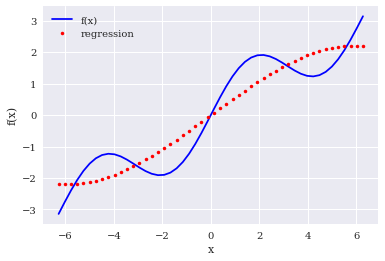

In [97]:
plt.plot(x, f(x) , 'b' , label='f(x)')
plt.plot(x, ry, 'r.', label='regression') 
plt.legend(loc=0)
plt .grid(True)
plt.xlabel( 'x' )
plt.ylabel('f(x)')
# plt.savefig('../../images/ch11/math_05.png');

In [105]:
matrix[3, :] = np.sin(x)  

In [106]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]

In [107]:
reg.round(4)  

array([0. , 0.5, 0. , 1. ])

In [108]:
ry = np.dot(reg, matrix)

In [109]:
np.allclose(f(x), ry)  

True

In [110]:
np.mean((f(x) - ry) ** 2)  

3.404735992885531e-31

Text(0, 0.5, 'f(x)')

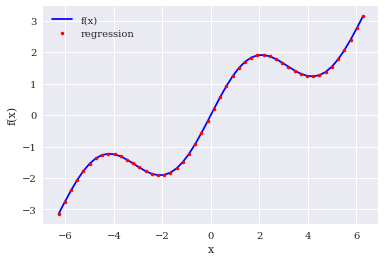

In [112]:
plt.plot(x, f(x) , 'b' , label='f(x)')
plt.plot(x, ry, 'r.', label='regression') 
plt.legend(loc=0)
plt.grid(True)
plt.xlabel( 'x' )
plt.ylabel('f(x)')
# plt.savefig('../../images/ch11/math_06.png');

#### Noisy Data

In [113]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)  
xn = xn + 0.15 * np.random.standard_normal(len(xn))  
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))  

In [114]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

Text(0, 0.5, 'f(x)')

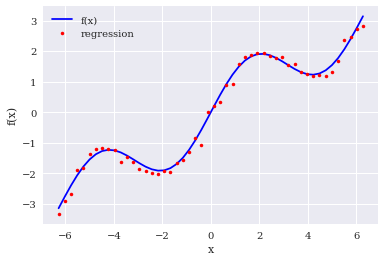

In [116]:
plt.plot(x, f(x) , 'b' , label='f(x)')
plt.plot(x, ry, 'r.', label='regression') 
plt.legend(loc=0)
plt .grid(True)
plt.xlabel( 'x' )
plt.ylabel('f(x)')
# plt.savefig('../../images/ch11/math_07.png');

#### Unsorted Data

In [118]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi  
yu = f(xu)

In [119]:
print(xu[:10].round(2))  
print(yu[:10].round(2))  

[ 4.54  1.9   4.36  1.5  -0.66  5.34 -1.25  1.56 -1.04  4.13]
[ 1.28  1.9   1.24  1.75 -0.94  1.86 -1.58  1.78 -1.38  1.23]


In [120]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

Text(0, 0.5, 'f(x)')

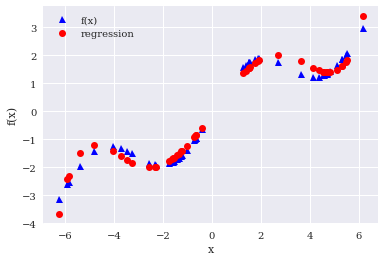

In [124]:
plt.plot(xu, yu, 'b^', label='f(x)') 
plt.plot(xu, ry, 'ro' , label='regression') 
plt.legend(loc=0)
plt.grid(True)
plt.xlabel( 'x')
plt.ylabel('f(x)')
# plt.savefig('../../images/ch11/math_08.png');

#### Multiple Dimensions

In [253]:
def fm(p):
    x, y = p
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

In [260]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y) 

In [262]:
Z = fm((X, Y))
x = X.flatten()  
y = Y.flatten()  

In [164]:
from mpl_toolkits.mplot3d import Axes3D  

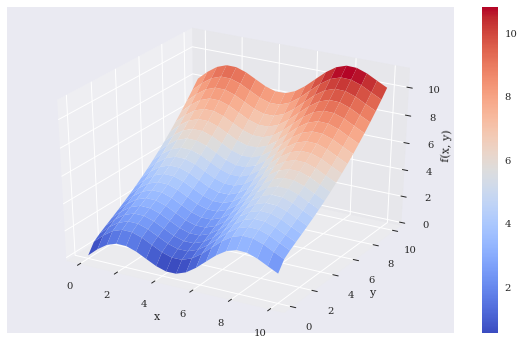

In [169]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, 
                       cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf)
# plt.savefig('math_09.png')

In [170]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)  
matrix[:, 5] = np.sin(x)  
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [171]:
reg = np.linalg.lstsq(matrix, fm((x, y)), rcond=None)[0]
print(reg)

[ 5.61880507e-15  2.50000000e-01  4.96995043e-16 -3.33188192e-16
  5.00000000e-02  1.00000000e+00  1.00000000e+00]


In [173]:
RZ = np.dot(matrix, reg).reshape((20, 20))  

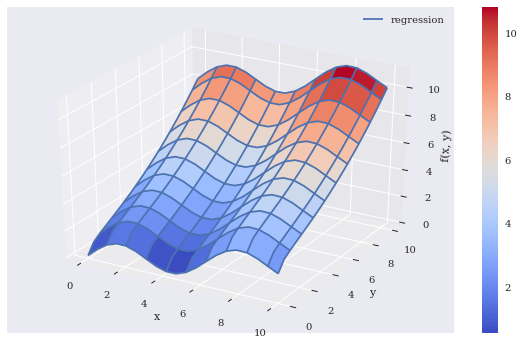

In [174]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z,
            cmap=mpl.cm.coolwarm)  
surf2 = ax.plot_wireframe(X, Y, RZ, 
                          label='regression')  
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf)
# plt.savefig('../../images/ch11/math_10.png');

### Interpolation
与回归相比，插值(例如，三次样条插值)在数学上更为复杂 。 它还被限制在低维度问题上 。 给定一组有序的观测点(按照 x 维排序)，基本的思路是在两个相邻数据点之间进行回归，不仅产生的分段插值函数完全匹配数据点，而且函数在数据点上连续可微分。 

In [178]:
import scipy.interpolate as spi  

In [179]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

In [180]:
def f(x):
    return np.sin(x) + 0.5 * x

In [181]:
ipo = spi.splrep(x, f(x), k=1)  

In [182]:
iy = spi.splev(x, ipo)  

In [183]:
np.allclose(f(x), iy)  

True

Text(0, 0.5, 'f(x)')

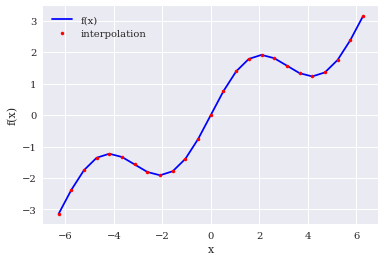

In [185]:
plt.plot(x, f(x ), 'b' , label='f(x)') 
plt.plot(x, iy, 'r.', label='interpolation') 
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [187]:
xd = np.linspace(1.0, 3.0, 50)  
iyd = spi.splev(xd, ipo)

Text(0, 0.5, 'f(x)')

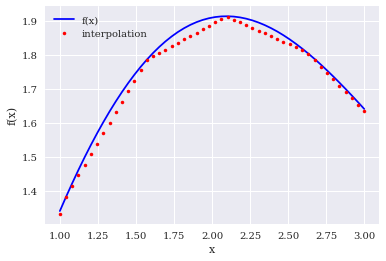

In [191]:
plt.plot(xd, f(xd), 'b' , label='f(x)') 
plt.plot(xd, iyd, 'r.', label='interpolation') 
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# plt.savefig('../../images/ch11/math_12.png');

In [192]:
ipo = spi.splrep(x, f(x), k=3)  
iyd = spi.splev(xd, ipo)  

In [193]:
np.allclose(f(xd), iyd)  

False

In [194]:
np.mean((f(xd) - iyd) ** 2)  

1.1349319851436892e-08

Text(0, 0.5, 'f(x)')

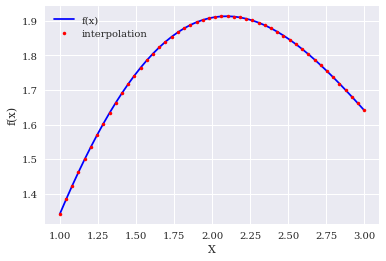

In [196]:
plt.plot(xd, f(xd), 'b', label='f(x)') 
plt.plot(xd, iyd, 'r.', label='interpolation' ) 
plt.legend(loc=0)
plt.grid(True)
plt .xlabel( 'X')
plt.ylabel('f(x)')

## Convex Optimization
在金融学和经济学中 ， 凸优化起着重要的作用 。 这方面的例子包括根据市场数据校准期权定价模型，或者效函数的优化 

In [198]:
def fm(p):
    x, y = p
    return (np.sin(x) + 0.05 * x ** 2
          + np.sin(y) + 0.05 * y ** 2)

In [199]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

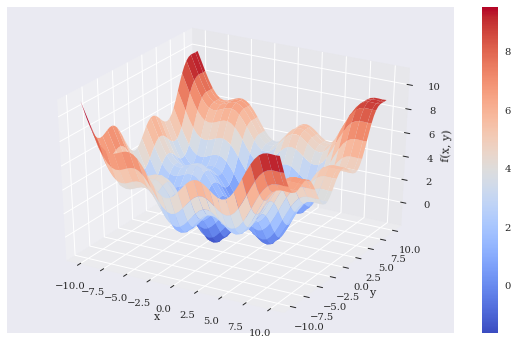

In [200]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                       cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf)
# plt.savefig('../../images/ch11/math_14.png');

### Global Optimization

In [202]:
import scipy.optimize as sco  

In [203]:
def fo(p):
    x, y = p
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print('%8.4f | %8.4f | %8.4f' % (x, y, z))  
    return z

In [248]:
output = True
sco.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)  

-10.0000 | -10.0000 |  11.0880
-10.0000 |  -5.0000 |   7.7529
-10.0000 |   0.0000 |   5.5440
-10.0000 |   5.0000 |   5.8351
-10.0000 |  10.0000 |  10.0000
 -5.0000 | -10.0000 |   7.7529
 -5.0000 |  -5.0000 |   4.4178
 -5.0000 |   0.0000 |   2.2089
 -5.0000 |   5.0000 |   2.5000
 -5.0000 |  10.0000 |   6.6649
  0.0000 | -10.0000 |   5.5440
  0.0000 |  -5.0000 |   2.2089
  0.0000 |   0.0000 |   0.0000
  0.0000 |   5.0000 |   0.2911
  0.0000 |  10.0000 |   4.4560
  5.0000 | -10.0000 |   5.8351
  5.0000 |  -5.0000 |   2.5000
  5.0000 |   0.0000 |   0.2911
  5.0000 |   5.0000 |   0.5822
  5.0000 |  10.0000 |   4.7471
 10.0000 | -10.0000 |  10.0000
 10.0000 |  -5.0000 |   6.6649
 10.0000 |   0.0000 |   4.4560
 10.0000 |   5.0000 |   4.7471
 10.0000 |  10.0000 |   8.9120


array([0., 0.])

In [206]:
output = False
opt1 = sco.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)

In [207]:
opt1

array([-1.4, -1.4])

In [208]:
fm(opt1)

-1.7748994599769203

### Local Optimization

In [212]:
output = True
opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001,
                maxfun=20)  

 -1.4000 |  -1.4000 |  -1.7749
 -1.4700 |  -1.4000 |  -1.7743
 -1.4000 |  -1.4700 |  -1.7743
 -1.3300 |  -1.4700 |  -1.7696
 -1.4350 |  -1.4175 |  -1.7756
 -1.4350 |  -1.3475 |  -1.7722
 -1.4088 |  -1.4394 |  -1.7755
 -1.4438 |  -1.4569 |  -1.7751
 -1.4328 |  -1.4427 |  -1.7756
 -1.4591 |  -1.4208 |  -1.7752
 -1.4213 |  -1.4347 |  -1.7757
 -1.4235 |  -1.4096 |  -1.7755
 -1.4305 |  -1.4344 |  -1.7757
 -1.4168 |  -1.4516 |  -1.7753
 -1.4305 |  -1.4260 |  -1.7757
 -1.4396 |  -1.4257 |  -1.7756
 -1.4259 |  -1.4325 |  -1.7757
 -1.4259 |  -1.4241 |  -1.7757
 -1.4304 |  -1.4177 |  -1.7757
 -1.4270 |  -1.4288 |  -1.7757


In [68]:
opt2

array([-1.42702972, -1.42876755])

In [69]:
fm(opt2)

-1.7757246992239009

In [70]:
output = False
sco.fmin(fo, (2.0, 2.0), maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

### Constrained Optimization

In [213]:
import math

In [219]:
def Eu(p):  
    s, b = p
    return -(0.5 * math.sqrt(s * 15 + b * 5) +
             0.5 * math.sqrt(s * 5 + b * 12))

In [220]:
cons = ({'type': 'ineq',
         'fun': lambda p: 100 - p[0] * 10 - p[1] * 10})  

In [221]:
result = sco.minimize(Eu, [5, 5], method='SLSQP',
                        constraints=cons)  

In [222]:
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])

In [223]:
result['x']  

array([8.02547122, 1.97452878])

In [224]:
-result['fun']  

9.700883611487832

## Integration
在估值和期权定价时，积分是一个重要的数学工具

In [231]:
import scipy.integrate as sci

In [232]:
def f(x):
    return np.sin(x) + 0.5 * x

In [237]:
x = np.linspace(0, 10,50)
y = f(x)
a = 0.5  
b = 9.5  
Ix = np.linspace(a, b, 50)  
Iy = f(Ix)  #  <4>

In [238]:
from matplotlib.patches import Polygon

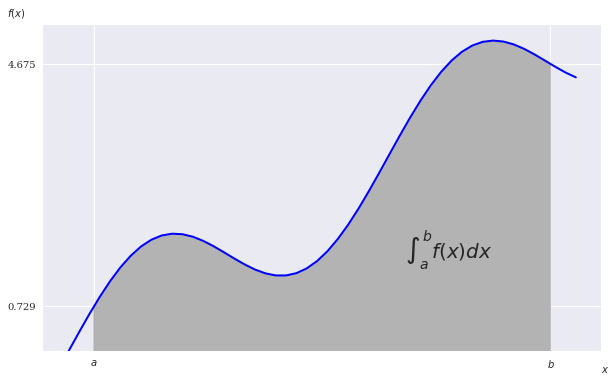

In [239]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)
Ix = np.linspace(a, b,50)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)]);
# plt.savefig('../../images/ch11/math_15.png');

### Numerical Integration

In [241]:
sci.fixed_quad(f, a, b)[0]  #高斯积分

24.366995967084602

In [242]:
sci.quad(f, a, b)[0]  #自适应求积分

24.374754718086752

In [243]:
sci.romberg(f, a, b)  #龙贝格积分

24.374754718086713

In [244]:
xi = np.linspace(0.5, 9.5, 25)

In [245]:
sci.trapz(f(xi), xi)  #梯形法则

24.352733271544516

In [246]:
sci.simps(f(xi), xi)   #辛普森法则

24.37496418455075

### Integration by Simulation

In [91]:
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b - a) + a  
    print(np.mean(f(x)) * (b - a))

24.804762279331463
26.522918898332378
26.265547519223976
26.02770339943824
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961207
23.67236746066989
23.679410416062886
24.424401707879305
24.239005346819056
24.115396924962802
24.424191987566726
23.924933080533783
24.19484212027875
24.117348378249833
24.100690929662274
23.76905109847816
